In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Data preparation with random labels
def prepare_data_with_random_labels():
    transform = transforms.ToTensor()
    train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
    
    # Assign random labels
    train_data.targets = torch.randint(0, 10, (len(train_data.targets),))
    test_data.targets = torch.randint(0, 10, (len(test_data.targets),))
    
    return DataLoader(train_data, batch_size=25, shuffle=True), DataLoader(test_data, batch_size=25, shuffle=False)

In [3]:
train_loader, test_loader = prepare_data_with_random_labels()

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 54801001.29it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 49706891.19it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 18407133.53it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 4511136.34it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
# Neural Network Definition
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.out_layer = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.out_layer(x)
        return x

In [5]:
model = DeepNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [6]:
# Training the model
def train_model(epochs, train_loader):
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

In [7]:
# Evaluating the model
def evaluate_model(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(loader)

In [8]:
# Main Training and Evaluation
EPOCHS = 30
train_losses, test_losses = [], []

In [9]:
for epoch in range(EPOCHS):
    train_model(1, train_loader)
    train_loss = evaluate_model(train_loader)
    test_loss = evaluate_model(test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Test Loss: {test_loss}')

Epoch 1, Train Loss: 2.3025075111786526, Test Loss: 2.3029603493213653
Epoch 2, Train Loss: 2.3025140731533367, Test Loss: 2.3025108188390733
Epoch 3, Train Loss: 2.3029433526595433, Test Loss: 2.303349104523659
Epoch 4, Train Loss: 2.3024778842926024, Test Loss: 2.3024664264917374
Epoch 5, Train Loss: 2.3024665253361065, Test Loss: 2.3025097244977952
Epoch 6, Train Loss: 2.3022930211822192, Test Loss: 2.3025485396385195
Epoch 7, Train Loss: 2.302327994406223, Test Loss: 2.302392420768738
Epoch 8, Train Loss: 2.3018117934465407, Test Loss: 2.3025864040851594
Epoch 9, Train Loss: 2.301523773173491, Test Loss: 2.302604927420616
Epoch 10, Train Loss: 2.301299853126208, Test Loss: 2.302877305150032
Epoch 11, Train Loss: 2.300911973118782, Test Loss: 2.3027399891614913
Epoch 12, Train Loss: 2.3000842891136806, Test Loss: 2.3029780346155166
Epoch 13, Train Loss: 2.2979860480626426, Test Loss: 2.3049910390377044
Epoch 14, Train Loss: 2.2978948027888935, Test Loss: 2.303912308216095
Epoch 15, 

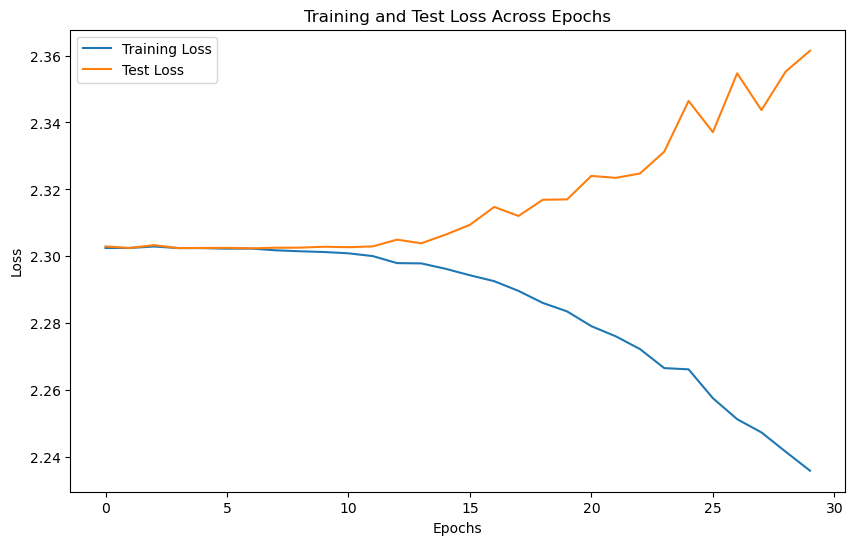

In [10]:
# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Across Epochs')
plt.legend()
plt.show()